In [1]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [2]:
sites = {
    "solbosch": "https://umap.openstreetmap.fr/fr/datalayer/781335/",
    "erasme": "https://umap.openstreetmap.fr/fr/datalayer/646792/",
    "plaine": "https://umap.openstreetmap.fr/fr/datalayer/646726/"
}

In [3]:
dfs = []
for k in sites:
    df = gpd.read_file(sites[k], )
    df['campus'] = k
    dfs.append(df)
df = pd.concat(dfs, sort=False)
df = df.loc[:,['campus', 'name', 'geometry']].rename(columns={'name': 'building'})
df = df.to_crs("EPSG:31370")
df.sample(5)

C:\Users\jlanderc\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,campus,building,geometry
38,solbosch,P2,"POLYGON ((150999.040 166941.381, 151028.566 16..."
0,plaine,None,"POLYGON ((151881.684 167711.745, 151887.463 16..."
8,solbosch,145 Buyl,"POLYGON ((151111.670 166899.245, 151112.728 16..."
39,solbosch,P3,"POLYGON ((151028.419 166985.438, 151064.429 16..."
17,erasme,A,"POLYGON ((142597.713 167114.530, 142647.688 16..."


In [4]:
df['area'] = df.geometry.area
df['centroid'] = df.geometry.centroid
df.sample(5)

,campus,building,geometry,area,centroid
14,solbosch,D,"POLYGON ((151139.094 166861.541, 151147.274 16...",2036.010646,POINT (151097.169 166832.295)
53,solbosch,Y,"POLYGON ((151008.872 167110.134, 151023.749 16...",705.289878,POINT (151007.791 167088.605)
37,solbosch,P1,"POLYGON ((150987.406 166965.852, 151016.792 16...",547.084519,POINT (151005.691 166965.372)
2,plaine,BC,"POLYGON ((152075.062 167664.543, 152080.631 16...",4406.973788,POINT (152046.848 167594.460)
11,erasme,J,"POLYGON ((142879.070 167027.931, 142879.497 16...",735.696892,POINT (142894.284 167026.676)


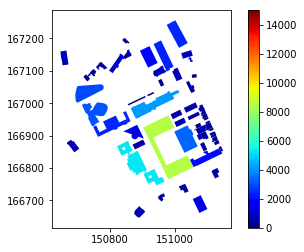

In [5]:
df.loc[df['campus']=='solbosch',:].plot(column='area', cmap='jet', legend=True, vmin=0, vmax=15e3)

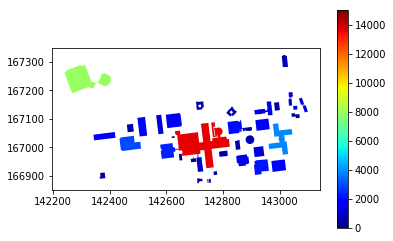

In [6]:
df.loc[df['campus']=='erasme',:].plot(column='area', cmap='jet', legend=True, vmin=0, vmax=15e3)

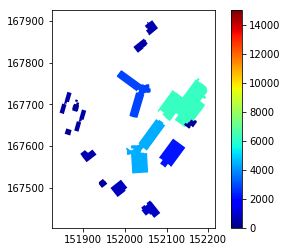

In [7]:
df.loc[df['campus']=='plaine',:].plot(column='area', cmap='jet', legend=True, vmin=0, vmax=15e3)